In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def neural_network(weights, inputs):
    # Unpack weights
    w11, w12, w21, w22, w31, w32, b1, b2, b3 = weights

    # Hidden layer
    h1 = sigmoid(inputs[0] * w11 + inputs[1] * w21 + b1)
    h2 = sigmoid(inputs[0] * w12 + inputs[1] * w22 + b2)

    # Output layer
    output = sigmoid(h1 * w31 + h2 * w32 + b3)
    return output

def error(weights):
    # XOR truth table
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([0, 1, 1, 0])

    predictions = np.array([neural_network(weights, x) for x in inputs])
    mse = np.mean((predictions - targets) ** 2)
    return mse




In [2]:
class Particle:
    def __init__(self, dim):
        self.position = np.random.randn(dim)
        self.velocity = np.random.randn(dim)
        self.best_position = self.position.copy()
        self.best_error = float('inf')
        self.positions = [self.position.copy()]  # Track positions for plotting
    def update_velocity(self, global_best_position, w, c1, c2):
        r1 = np.random.rand(len(self.position))
        r2 = np.random.rand(len(self.position))
        cognitive_velocity = c1 * r1 * (self.best_position - self.position)
        social_velocity = c2 * r2 * (global_best_position - self.position)
        self.velocity = w * self.velocity + cognitive_velocity + social_velocity

    def update_position(self):
        self.position += self.velocity
        self.positions.append(self.position.copy())  # Track position

def pso(dim, error_func, num_particles, max_iter , w , c1, c2):
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best_position = particles[0].position
    global_best_error = float('inf')

    error_history = []

    #慣性權重線性下降
    w_max = 0.5
    w_min = 0.3

    print("PSO Parameters:")
    print(f"Number of particles: {num_particles}")
    print(f"Max iterations: {max_iter}")
    print(f"Inertia weight (w): {w}")
    print(f"Cognitive coefficient (c1): {c1}")
    print(f"Social coefficient (c2): {c2}")

    for i in range(max_iter):
        w = w_max - i * (w_max - w_min) / max_iter
        #w = (w_max + (max_iter - i) * (w_max - w_min)) / max_iter
        print(f"w : {w}")
        for particle in particles:
            current_error = error_func(particle.position)
            if current_error < particle.best_error:
                particle.best_error = current_error
                particle.best_position = particle.position
            if current_error < global_best_error:
                global_best_error = current_error
                global_best_position = particle.position

        for particle in particles:
            particle.update_velocity(global_best_position, w, c1, c2)
            particle.update_position()

        error_history.append(global_best_error)
        print(f"Iteration {i+1}/{max_iter}, Error: {global_best_error}")



    return  particles,global_best_position, error_history


In [3]:
import random

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutate(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] += np.random.randn()
    return chromosome

def ga(dim, error_func, population_size, max_generations, mutation_rate):
    population = [np.random.randn(dim) for _ in range(population_size)]
    best_chromosome = population[0]
    best_error = float('inf')

    error_history = []


    print("GA Parameters:")
    print(f"Population size: {population_size}")
    print(f"Max generations: {max_generations}")
    print(f"Mutation rate: {mutation_rate}")


    for generation in range(max_generations):
        population = sorted(population, key=error_func)
        if error_func(population[0]) < best_error:
            best_chromosome = population[0]
            best_error = error_func(best_chromosome)

        new_population = population[:2]  # Elitism: carry the best two to the next generation
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population[:10], 2)  # Select parents from the top 10
            child1, child2 = crossover(parent1, parent2)
            new_population += [mutate(child1, mutation_rate), mutate(child2, mutation_rate)]

        population = new_population
        error_history.append(best_error)
        print(f"Generation {generation+1}/{max_generations}, Error: {best_error}")

    return best_chromosome, error_history



PSO Parameters:
Number of particles: 200
Max iterations: 100
Inertia weight (w): 0.5
Cognitive coefficient (c1): 1
Social coefficient (c2): 1
w : 0.5
Iteration 1/100, Error: 0.24388020340851035
w : 0.498
Iteration 2/100, Error: 0.23862621634357503
w : 0.496
Iteration 3/100, Error: 0.22103749297558672
w : 0.494
Iteration 4/100, Error: 0.19669538175213405
w : 0.492
Iteration 5/100, Error: 0.17146840518459777
w : 0.49
Iteration 6/100, Error: 0.1425872421515764
w : 0.488
Iteration 7/100, Error: 0.11671107364211955
w : 0.486
Iteration 8/100, Error: 0.09800625693749446
w : 0.484
Iteration 9/100, Error: 0.06884160612594796
w : 0.482
Iteration 10/100, Error: 0.052434400045478405
w : 0.48
Iteration 11/100, Error: 0.031663100492879404
w : 0.478
Iteration 12/100, Error: 0.025620457823138345
w : 0.476
Iteration 13/100, Error: 0.017970053985343393
w : 0.474
Iteration 14/100, Error: 0.0123853712053018
w : 0.472
Iteration 15/100, Error: 0.008909189935647502
w : 0.47
Iteration 16/100, Error: 0.0066389

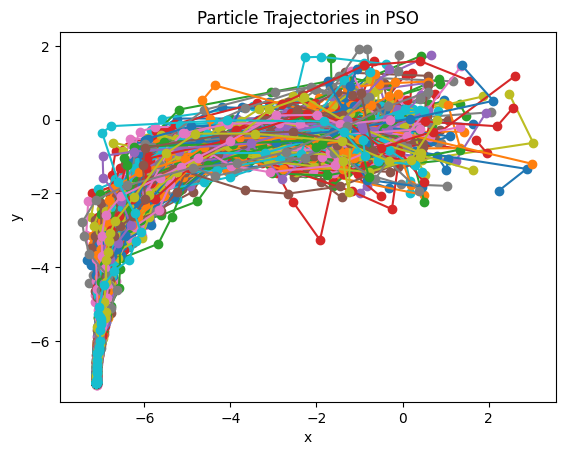

GA Parameters:
Population size: 50
Max generations: 100
Mutation rate: 0.1
Generation 1/100, Error: 0.2472070841240655
Generation 2/100, Error: 0.23576263192481178
Generation 3/100, Error: 0.23576263192481178
Generation 4/100, Error: 0.2289600087360072
Generation 5/100, Error: 0.2289600087360072
Generation 6/100, Error: 0.2289600087360072
Generation 7/100, Error: 0.22891416814225884
Generation 8/100, Error: 0.21298227869779685
Generation 9/100, Error: 0.21288401237096927
Generation 10/100, Error: 0.20708831730497207
Generation 11/100, Error: 0.20423219524780784
Generation 12/100, Error: 0.20268219053317066
Generation 13/100, Error: 0.19892430856007506
Generation 14/100, Error: 0.19892430856007506
Generation 15/100, Error: 0.1969839475581544
Generation 16/100, Error: 0.1930032352948709
Generation 17/100, Error: 0.19006460610595938
Generation 18/100, Error: 0.1886295537110625
Generation 19/100, Error: 0.18777093055476898
Generation 20/100, Error: 0.18724438497891005
Generation 21/100, Er

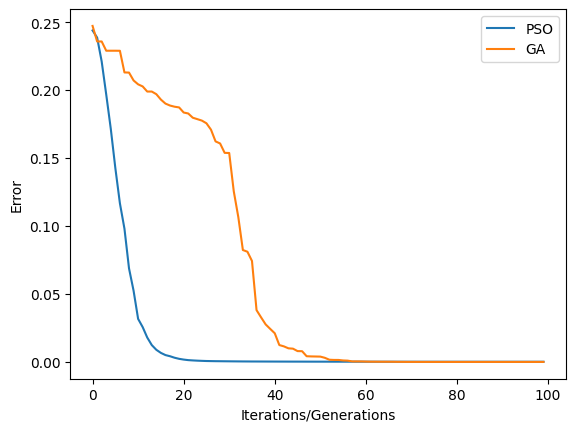

In [4]:
import matplotlib.pyplot as plt

# PSO parameters
dim = 9  # Number of weights and biases
#pso_best_weights, pso_error_history = pso(dim, error, num_particles=100, max_iter=60, w=0.8, c1=1, c2=1)


# Run PSO
particles, pso_best_weights, pso_error_history = pso(dim, error, num_particles=200, max_iter=100, w=0.5, c1=1, c2=1)

fig, ax = plt.subplots()
for particle in particles:
    positions = np.array(particle.positions)
    ax.plot(positions[:, 0], positions[:, 1], marker='o')  # Plotting only the first two dimensions
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Particle Trajectories in PSO')
plt.show()

# GA parameters
ga_best_weights, ga_error_history = ga(dim, error, population_size=50, max_generations=100, mutation_rate=0.1)

# Plotting the results
plt.plot(pso_error_history, label='PSO')
plt.plot(ga_error_history, label='GA')
plt.xlabel('Iterations/Generations')
plt.ylabel('Error')
plt.legend()
plt.show()


In [5]:
test_inputs = [(0.7, 0.3), (0.6, 0.4), (0.5, 0.5) , (0.0, 0.0) , (0.0, 1.0) , (1.0, 0.0) ,(1.0, 1.0)]

print("Testing PSO optimized network:")
for inputs in test_inputs:
    output = neural_network(pso_best_weights, inputs)
    print(f"Inputs: {inputs}, Output: {output}")

print("Testing GA optimized network:")
for inputs in test_inputs:
    output = neural_network(ga_best_weights, inputs)
    print(f"Inputs: {inputs}, Output: {output}")

Testing PSO optimized network:
Inputs: (0.7, 0.3), Output: 0.06832660770628653
Inputs: (0.6, 0.4), Output: 0.005636354893680645
Inputs: (0.5, 0.5), Output: 0.002115856739133994
Inputs: (0.0, 0.0), Output: 0.007098072036050915
Inputs: (0.0, 1.0), Output: 0.9966911372448127
Inputs: (1.0, 0.0), Output: 0.9788209044368498
Inputs: (1.0, 1.0), Output: 0.0030181855311412144
Testing GA optimized network:
Inputs: (0.7, 0.3), Output: 0.0002738352422793422
Inputs: (0.6, 0.4), Output: 0.0001308370760314633
Inputs: (0.5, 0.5), Output: 0.0001267028770096442
Inputs: (0.0, 0.0), Output: 0.00015488779455805822
Inputs: (0.0, 1.0), Output: 0.9998919589214638
Inputs: (1.0, 0.0), Output: 0.9996909525000461
Inputs: (1.0, 1.0), Output: 0.0001202174356780299
